### Hello everyone! My name is Mostafa and this is the first task in the oasis data science internship
### we will work on the Iris dataset to classify the species of the flower (Iris-setosa, Iris-versicolor, Iris-virginica)

# Import Modules

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset

In [15]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
#Drop the Id column because we don't need it
df = df.drop(columns=["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
#basic info about the dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualize the data

In [13]:
labels = df.Species.unique()
labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

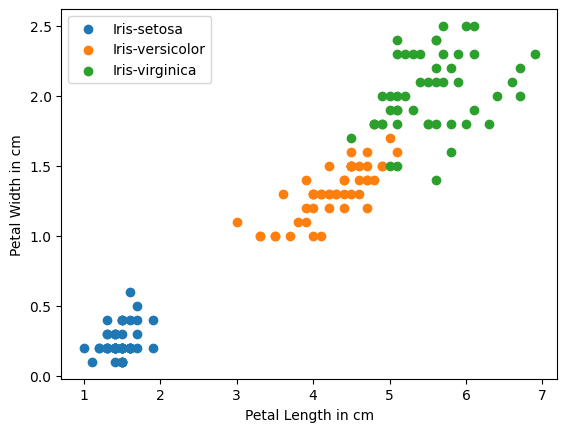

In [14]:
for label in labels:
    data = df[df["Species"] == label]
    plt.scatter(data["PetalLengthCm"],data["PetalWidthCm"],label=label)
    plt.xlabel("Petal Length in cm")
    plt.ylabel("Petal Width in cm")
    plt.legend()
        

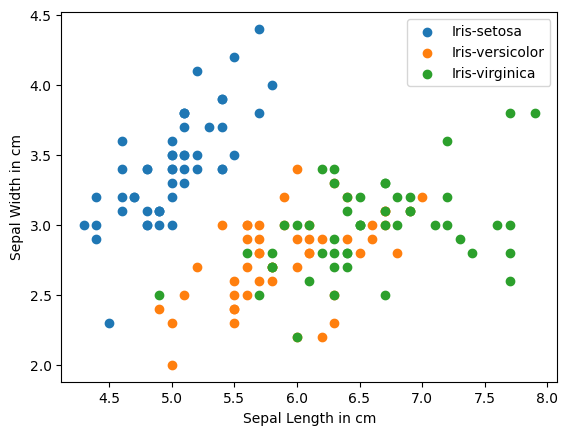

In [19]:
for label in labels:
    data = df[df["Species"] == label]
    plt.scatter(data["SepalLengthCm"],data["SepalWidthCm"],label=label)
    plt.xlabel("Sepal Length in cm")
    plt.ylabel("Sepal Width in cm")
    plt.legend()

# Prepare the model

## Preprocess the dataset


In [12]:
#Check for null values
df.isnull().sum()
#No null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
#Convert labels from strings to numeric values
from sklearn.preprocessing import LabelEncoder

le =  LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## train the model

In [32]:
from sklearn.model_selection import train_test_split

labels = df["Species"]
features = df.drop(columns=["Species"])
#split data
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=.3)

In [33]:
# There are alot of models that can be used to solve this 
#problem like logistic regression and k nearest neighbours
#we will use Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [34]:
print("Accuracy of the model: ",model.score(x_test,y_test)*100,"%")

Accuracy of the model:  97.77777777777777 %


# Examples


In [35]:
print(y_test[:5],f"Model predicted: {model.predict(x_test[:5])}" ) 

48     0
94     1
87     1
120    2
46     0
Name: Species, dtype: int32 Model predicted: [0 1 1 2 0]
